In [60]:
## ---- Partition Cell Set Network Heatmap Module Analysis ---- 0681.04.00
## Load Analysis Parameters (Parm1)
## Load Network Utilities
## Loop Through Each Partition and Perform Analysis as Follows:
## Load Partition Cell Set
## Plot Module Gene Heatmaps, Amended fro 0681.01.00 to Address Nature Review Comments
## Formalized Heatmap Differianl Express Analysis as Started in 0681.03.00

In [61]:
## Create a Working Input and Output Data Directory, If Id Does Not Exist
parentdir <- '/gpfs/group/torkamani/devans/'
datdir <- paste(parentdir, 'CDC2', sep = '')
if (!file.exists(datdir)) {
    dir.create(datdir)
}
setwd(datdir)

In [62]:
## Read the parameters file
ps <- read.table(file = 'parms.txt', stringsAsFactors = FALSE, header = TRUE)

In [63]:
## Load Monocle3 and Seurat Libraries
library(monocle3)
library(Seurat)
library(dplyr)
library(magrittr)
library(ggplot2)
library(gridExtra)
library(Matrix)
library(rhdf5)
library(grid)
library(igraph)
library(corpcor)
library(fdrtool)
library(readxl)
library(mixOmics)
# library(DESeq2)

In [64]:
## Load modified version of Monocle 3 dot plot (adds as.ordered type)
source('~/code/CSC.Run2/0700.00.00.Carotid.SC.Utilities.01.r')

In [65]:
## Read the previously preprocessed downsampled cell set data object
down_stdycds <- readRDS(file = paste(ps$outdir,
            'Aggregated.downsampled.QC.NoDoublets.Repartitioned.rds', sep = ''))

In [66]:
## Build a gene short name to gene id (Ensembl) lookup
short2geneid <- fData(down_stdycds)@rownames
names(short2geneid) <- fData(down_stdycds)@listData$gene_short_name

In [67]:
## Build a gene id (Ensembl) to gene short name lookup
geneid2short <- fData(down_stdycds)@listData$gene_short_name
names(geneid2short) <- fData(down_stdycds)@rownames

In [68]:
## Create variables for how cells sets are organized
cellgrps <- c('healthy', 'diseased', 'healthy', 'diseased', 'healthy', 'diseased')
cellpats <- c('ID Number 1', 'ID Number 1', 'ID Number 2', 'ID Number 2', 'ID Number 3', 'ID Number 3')

In [69]:
## Define and Assign Cell Types
celltypes6 <- c('1-Macrophages',
                '2-Endothelial Cells',
                '3-VSMCs',
                '4-Natural Killer Cells',
                '5-Cytotoxic T Lymphocytes',
                '6-B Lymphocytes')

In [70]:
## Get the pairs of module genes from EC (1 and 36) and VSCM (13 and 31) networks
## Set the q-value Cutoff
diff_exp_qval_cut <- 0.05
## EC Genes First
ec_netmod_file <- paste(datdir, '/', ps$outdir, celltypes6[2],
                          '/Dense.20k.Network.Module.Genes.Rev1.txt', sep = '')
ec_netmod <- read.table(ec_netmod_file, header = TRUE, sep = '\t',
                          stringsAsFactors = FALSE, quote = '')[, c(1, 3:9)]
ec_modgenes1 <- ec_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 1) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
ec_modgenes2 <- ec_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 2) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
ec_modgenes6 <- ec_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 6) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
ec_modgenes35 <- ec_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 35) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
ec_modgenes36 <- ec_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 36) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)

ec_modgenes1_ids <- short2geneid[ec_modgenes1$gene_short_name]
ec_modgenes36_ids <- short2geneid[ec_modgenes36$gene_short_name]

ec_modgenes_1_36 <- c(ec_modgenes1$gene_short_name,
                      ec_modgenes36$gene_short_name)
ec_modgenes_1_36_ids <- short2geneid[ec_modgenes_1_36]

ec_modgenes_1_35_36 <- c(ec_modgenes1$gene_short_name,
                         ec_modgenes35$gene_short_name,
                         ec_modgenes36$gene_short_name)

ec_modgenes_1_2_6_35_36 <- c(ec_modgenes1$gene_short_name,
                         ec_modgenes2$gene_short_name, 
                         ec_modgenes6$gene_short_name, 
                         ec_modgenes35$gene_short_name,
                         ec_modgenes36$gene_short_name)

ec_modgenes_1_35_36_ids <-  short2geneid[ec_modgenes_1_35_36]
ec_modgenes_1_2_6_35_36_ids <-  short2geneid[ec_modgenes_1_2_6_35_36]


## VSMC Genes Seconds
vsmc_netmod_file <- paste(datdir, '/', ps$outdir, celltypes6[3],
                          '/Dense.20k.Network.Module.Genes.Rev1.txt', sep = '')
vsmc_netmod <- read.table(vsmc_netmod_file, header = TRUE, sep = '\t',
                          stringsAsFactors = FALSE, quote = '')[, c(1, 3:9)]
vsmc_modgenes9 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 9) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes11 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 11) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes13 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 13) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes24 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 24) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes28 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 28) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes30 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 30) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes31 <- vsmc_netmod %>% filter(de_qval < diff_exp_qval_cut) %>% 
                              filter(module_id == 31) %>% 
                              dplyr::select(gene_short_name, de_norm_eff, de_qval)
vsmc_modgenes_13_31 <- c(vsmc_modgenes13$gene_short_name, vsmc_modgenes31$gene_short_name)
vsmc_modgenes13_ids <- short2geneid[vsmc_modgenes13$gene_short_name]
vsmc_modgenes31_ids <- short2geneid[vsmc_modgenes31$gene_short_name]
vsmc_modgenes_13_31_ids <- short2geneid[vsmc_modgenes_13_31]
vsmc_modgenes_11_30 <- c(vsmc_modgenes11$gene_short_name,
                         vsmc_modgenes30$gene_short_name)
vsmc_modgenes_11_35_ids <- short2geneid[vsmc_modgenes_11_30]

vsmc_modgenes_11_13_30_31 <- c(vsmc_modgenes11$gene_short_name,
                              vsmc_modgenes13$gene_short_name,
                              vsmc_modgenes30$gene_short_name,
                              vsmc_modgenes31$gene_short_name)

vsmc_modgenes_9_11_13_30_31 <- c(vsmc_modgenes9$gene_short_name,
                              vsmc_modgenes11$gene_short_name,
                              vsmc_modgenes13$gene_short_name,
                              vsmc_modgenes30$gene_short_name,
                              vsmc_modgenes31$gene_short_name)

vsmc_modgenes_9_11_13_24_28_30_31 <- c(vsmc_modgenes9$gene_short_name,
                              vsmc_modgenes11$gene_short_name,
                              vsmc_modgenes13$gene_short_name,
                              vsmc_modgenes24$gene_short_name,
                              vsmc_modgenes28$gene_short_name,
                              vsmc_modgenes30$gene_short_name,
                              vsmc_modgenes31$gene_short_name)

vsmc_modgenes_9_11_13_24_28_30_31_plus2 <- c(vsmc_modgenes_9_11_13_24_28_30_31, 'CCL4', 'IGKC')


vsmc_modgenes_11_13_30_31_ids <- short2geneid[vsmc_modgenes_11_13_30_31]
vsmc_modgenes_9_11_13_30_31_ids <- short2geneid[vsmc_modgenes_9_11_13_30_31] 
vsmc_modgenes_9_11_13_24_28_30_31_ids <- short2geneid[vsmc_modgenes_9_11_13_24_28_30_31] 
vsmc_modgenes_9_11_13_24_28_30_31_plus2_ids <- short2geneid[vsmc_modgenes_9_11_13_24_28_30_31_plus2] 

## These variables are the same as above
vsmc_modgenes_11_30a <- c('TMSB4X', 'FXYD5', 'MYH10', 'RAMP1', 'ANXA2',
                  'TSC22D3', 'F2R', 'SFRP4', 'ECM1', 'ABHD14A',
                  'JDP2', 'DDIT4', 'VAT1', 'ABLIM1', 'S100A10',
                  'ZNF385D', 'FRZB', 'MAP1B', 'ZNF385B', 'GAP43',
                  'PDE5A', 'PRSS35', 'CCDC68', 'SH3BGRL3', 'UXT',
                  'CDKN2C', 'LMO7', 'ENPP2', 'NDNF', 'MCUB', 'HTR2B',
                  'MBNL1-AS1', 'TBC1D12', 'PTN', 'IL17D', 'SFT2D1',
                  'IGSF10', 'BHLHE41', 'NUCKS1', 'HACD3', 'IL18',
                  'TPPP3', 'EMP3', 'CLIC2', 'ATF5', 'MSC-AS1', 'FBLN2',
                  'LTBP4', 'F10', 'FSTL1', 'FBN1', 'TNXB', 'PCOLCE2',
                  'PLAT', 'PLPP3', 'SLIT3', 'CD248', 'AKAP12', 'PLBD1',
                  'SEMA3C', 'MFAP5', 'C17orf58', 'METRNL', 'UGDH',
                  'HSD11B1', 'TGFBR3', 'TSKU', 'FLRT2', 'SEMA3B',
                  'PI16', 'RAB32', 'DCLK1', 'CD55', 'LINC01133',
                  'FGFR1', 'CSF1', 'SLC16A7', 'NT5E', 'ADAMTSL4',
                  'HTRA3', 'FAM177A1', 'C1QTNF3', 'PPP2R2A', 'GPC1',
                  'EBF2', 'AMOTL2', 'NTM', 'CMTM3', 'CADM3')
vsmc_modgenes_11_30a_ids <- short2geneid[vsmc_modgenes_11_30]

ec_modgenes_35a <- c('FEZ1', 'OLFM1', 'ARHGAP18', 'COL4A1', 'MEDAG', 'COL4A2',
             'PDGFD', 'IGFBP7', 'RGS3', 'PGF', 'ITGA6', 'MGLL', 'ACKR3',
             'ANGPT2', 'PLXNA4', 'EMCN', 'TIMP3', 'GSN', 'FILIP1', 'LAMB1',
             'ELK3', 'ARPC2', 'NES', 'MXD4', 'PLVAP', 'ESM1', 'CITED4',
             'TMED3', 'EIF4EBP1', 'RFLNB')
ec_modgenes_35a_ids <- short2geneid[ec_modgenes_35a]

In [71]:
## Read in Toms  list of genes for VSMC and EC Heatmaps (Response to Nature.Rejection)
VSMC_PNR_file <- 'PostNatureRejection.Updates/Updated.VSMC.Genes.Heatmap.csv'
VSMC_PNR_genes <- read.table(VSMC_PNR_file, header = FALSE, sep = '', stringsAsFactors = FALSE)[,1]
VSMC_group <- VSMC_PNR_genes[1]
VSMC_PNR_genes_ids <- short2geneid[VSMC_PNR_genes[2:length(VSMC_PNR_genes)]]
VSMC_PNR_genes <- geneid2short[VSMC_PNR_genes_ids]
VSMC_group

EC_PNR_file <- 'PostNatureRejection.Updates/Updated.EC.Genes.Heatmap.csv'
EC_PNR_genes <- read.table(EC_PNR_file, header = FALSE, sep = '', stringsAsFactors = FALSE)[,1]
EC_group <- EC_PNR_genes[1]
EC_PNR_genes_ids <- short2geneid[EC_PNR_genes[2:length(EC_PNR_genes)]]
EC_PNR_genes <- geneid2short[EC_PNR_genes_ids]
EC_group 

[1] "VSMC_Modules_2_9_11_30_13_31_24_28"

[1] "EC_Modules_1_35_and_36_2_6"

## VSMC Unknown Process (Modules_2_9_11_30_13_31_24_28)¶
### Updated code

In [72]:
## Get the Expression Set for VSMC Modules_2_9_11_30_13_31_24_28 genes
p <- 3
vsmc_bool <- (colData(down_stdycds)$assigned_cell_type == celltypes6[p])
vsmcmod_cds <- down_stdycds[fData(down_stdycds)@rownames %in% VSMC_PNR_genes_ids, vsmc_bool]
colData(vsmcmod_cds)$condtype <- paste('vsmc',
    c('hea', 'dis')[(colData(vsmcmod_cds)$condition == 'diseased') + 1], sep = '-')
## colData(vsmcmod_cds)$sidecolor[colData(vsmcmod_cds)$condtype == 'ec-dis'] <- 'red'
## colData(vsmcmod_cds)$sidecolor[colData(vsmcmod_cds)$condtype == 'ec-hea'] <- 'blue'
colData(vsmcmod_cds)$sidecolor[colData(vsmcmod_cds)$condtype == 'vsmc-dis'] <- 'orange'
colData(vsmcmod_cds)$sidecolor[colData(vsmcmod_cds)$condtype == 'vsmc-hea'] <- 'cyan'

## Down Sample
cttable <- table(colData(vsmcmod_cds)$sidecolor)
smallset <- min(cttable)
cells2keep <- NULL
set.seed(101)
for (cellset_col in names(cttable)) {
    cellsetrow <-  which(colData(vsmcmod_cds)$sidecolor == cellset_col)
    cells2keep <- c(cells2keep, sample(cellsetrow, smallset, replace = FALSE))
}
vsmcmod_cds <- vsmcmod_cds[, cells2keep] 

## Print the down sampled data set sizes
table(colData(vsmcmod_cds)$sidecolor)

## Get the expresion matrix
expdat_vsmcmod <- as.matrix(exprs(vsmcmod_cds))
rownames(expdat_vsmcmod) <- geneid2short[rownames(expdat_vsmcmod)] 

## Set up the output file names and plot titles
f1 <- '/Heatmap.VSMC.Mod2_9_11_30_13_31_24_28.Genes.comp.bin.comp.bin.down.OnOff2Plus.preclustered.Rev1.pdf'
f1 <- paste(datdir, '/', ps$outdir, celltypes6[p], f1, sep = '')
title1 <- 'VSMC Network Modules 2_9_11_30_13_31_24_28\nGenes, Cells Pre-Clustered'

f2 <- '/Heatmap.VSMC.ModMod2_9_11_30_13_31_24_28.Genes.comp.bin.comp.bin.down.OnOff2Plus.fullyclustered.Rev1.pdf'
f2 <- paste(datdir, '/', ps$outdir, celltypes6[p], f2, sep = '')
title2 <-  'VSMC Network Modules 2_9_11_30_13_31_24_28\nGenes, Cells Fully Clustered'

f3 <- '/DotPlot.VSMC.Mod2_9_11_30_13_31_24_28.Genes.Rev1.pdf'
f3 <- paste(datdir, '/', ps$outdir, celltypes6[p], f3, sep = '')

f4 <- '/Heatmap.VSMC.Mod2_9_11_30_13_31_24_28.Genes.comp.bin.comp.bin.down.OnOff2Plus.fullyclustered.cut.Rev1.pdf'
f4 <- paste(datdir, '/', ps$outdir, celltypes6[p], f4, sep = '')
title4 <-  'VSMC Network Modules 2_9_11_30_13_31_24_28\nGenes, Cells Fully Clustered with Cuts'

f5 <- '/DotPlot.VSMC.Mod2_9_11_30_13_31_24_28.Genes.cuts.Rev1.pdf'
f5 <- paste(datdir, '/', ps$outdir, celltypes6[p], f5, sep = '')

## Prepare for pre-clustering
vsmc_dw <- which(colData(vsmcmod_cds)$condtype == 'vsmc-dis')
vsmc_hw <- which(colData(vsmcmod_cds)$condtype == 'vsmc-hea')

## Transform the data
dims <- dim(expdat_vsmcmod)
expdatbo <- (expdat_vsmcmod > 1) * 1

## Set up clustering parameters
## Distance method, cluster method, heatmap color scheme, legend
distmeth <- c('binary', 'binary')
clustmeth = c('complete', 'complete')
my_palettebol <- colorRampPalette(c('#660066', 'yellow'))(n = 2)
legendlstbol <- list(legend = c('VSMC DIS', 'VSMC HEA'),
              col = c('orange', 'cyan'), title = 'Cell Types', cex = .7)

## Individually cluster the columns of the two cell sets
vsmc_dcim <- cim(expdatbo[, vsmc_dw], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'col', save = 'pdf', name.save = 'temp.ready.to.delete',
    col.sideColors = colData(vsmcmod_cds)$sidecolor[vsmc_dw],
    symkey = FALSE)
vsmc_hcim <- cim(expdatbo[, vsmc_hw], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'col', save = 'pdf', name.save = 'temp.ready.to.delete',
    col.sideColors = colData(vsmcmod_cds)$sidecolor[vsmc_hw],
    symkey = FALSE)

## The is the combined (concantenated) preclustered cell types
## which will are plotted with genes fully clustered (check plot)
parthclust <- c(colnames(vsmc_dcim$mat), colnames(vsmc_hcim$mat))
colornames <-colData(vsmcmod_cds)$sidecolor
names(colornames) <- colnames(expdatbo)

# # This is just a check plot to the screen
# cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
#     scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
#     color = my_palettebol, cluster = 'row', # save = 'pdf', name.save = 'temp.ready.to.delete',
#     col.sideColors = colornames[parthclust],
#     symkey = FALSE)

## Repeated from above, this time to a file
pdf(f1, width = 8, height = 30)
cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'row', title = title1,
    col.sideColors = colornames[parthclust],
    symkey = FALSE)
dev.off()

## The is again the combined cell types, plotted with both genes and cells fully clustered
cim_save <- cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'both', save = 'pdf', name.save = 'temp.ready.to.delete',
    col.sideColors = colornames[parthclust], 
    symkey = FALSE)

## This is a check plot to the screen and it should match the above plot perfectly
# cim(expdatbo[, colnames(cim_save$mat)], dist.method = distmeth, clust.method = clustmeth,
#     scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
#     color = my_palettebol, cluster = 'row', # save = 'pdf', name.save = 'temp.ready.to.delete',
#     col.sideColors = colornames[colnames(cim_save$mat)], 
#     symkey = FALSE)

## Repeated from above, this time to a file (make sure to cluster again to plot cell dendrogram)
pdf(f2, width = 8, height = 30)
cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'both', title = title2,
    col.sideColors = colornames[parthclust], 
    symkey = FALSE)
dev.off()

specialglist <- short2geneid[cim_save$row.names]
pdf(f3, width = 2.75, height = 34)
plot_genes_by_group2(vsmcmod_cds,
                    axis_order = "group_marker",
                    specialglist,
                    group_cells_by = "condtype",
                    ordering_type = "as_ordered", 
                    max.size = 3,
                    norm_method = 'size_only',
                    scale_max = 3, scale_min = -3)
dev.off()

## Set up for plot with special cut regions
cim_o <- colnames(cim_save$mat)
cut0 <- 1
cut1 <- floor(length(cim_o) * 1.408 / 6.78125)
cut2 <- floor(length(cim_o) * 3.018 / 6.78125)
cut3 <- floor(length(cim_o) * 4.461 / 6.78125)
cut4 <- length(cim_o)
wcut1 <- which(colnames(expdatbo) %in% cim_o[cut0:cut1])
wcut2 <- which(colnames(expdatbo) %in% cim_o[(cut1 + 1):cut2])
wcut3 <- which(colnames(expdatbo) %in% cim_o[(cut2 + 1):cut3])
wcut4 <- which(colnames(expdatbo) %in% cim_o[(cut3 + 1):cut4])
wcuts <- c(wcut1, wcut2, wcut3, wcut4)
cell_subg_cols <- vector(mode = 'character', length = length(cim_o))
cell_subg_names <- vector(mode = 'character', length = length(cim_o))
cell_subg_cols[wcut1] <- '#404040' # '1gray'
cell_subg_names[wcut1] <- '1gray'
cell_subg_cols[wcut2] <- '#606060' # '2gray'
cell_subg_names[wcut2] <- '2gray'
cell_subg_cols[wcut3] <- '#808080' # '3gray'
cell_subg_names[wcut3] <- '3gray'
cell_subg_cols[wcut4] <- '#A0A0A0' # '4gray'
cell_subg_names[wcut4] <- '4gray'
names(cell_subg_cols) <- cim_o

## Plot the same fully clustered plot, this time without reclustering the cells,
# but coloring the horizontal color bar according to the cuts
pdf(f4, width = 8, height = 30)
cim_cells <- cim(expdatbo[, colnames(cim_save$mat)], dist.method = distmeth,
    clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'row', title = title4,
    col.sideColors = cell_subg_cols[wcuts],
    symkey = FALSE)
dev.off()

specialglist <- specialglist <- short2geneid[cim_save$row.names]
colData(vsmcmod_cds)$subgroups[wcuts] <- cell_subg_names[wcuts]
pdf(f5, width = 3.25, height = 34)
plot_genes_by_group2(vsmcmod_cds,
                    axis_order = "group_marker",
                    specialglist,
                    group_cells_by = "subgroups",
                    ordering_type = "as_ordered", 
                    max.size = 3,
                    norm_method = 'size_only',
                    scale_max = 3, scale_min = -3)
dev.off()

# Perform DE Analysis on the vsmc heatmat subgroup
f6 <- '/Diff.vsmc_group1.KeepFail.NoModels.txt'
f6 <- paste(datdir, '/', ps$outdir, celltypes6[p], f6, sep = '')
gene_vsmc_wcut1_fits_pat_cond_adj <- fit_models(vsmcmod_cds[, wcut1], cores = 4,
                                model_formula_str = "~patient + condition")
all_coef1 <- NULL
## Get the DE Coefficients
all_coef1 <- coefficient_table(gene_vsmc_wcut1_fits_pat_cond_adj)
# Extract the relavent data from the DE tables
condition_terms1 <- all_coef1 %>% filter(term == "conditionhealthy")
condition_termsb1 <- condition_terms1 %>% filter(status == 'OK')
write.table(condition_terms1[,c(1, 4:12)], f6, col.names = TRUE, row.names = FALSE)

f7 <- '/Diff.vsmc_group2.KeepFail.NoModels.txt'
f7 <- paste(datdir, '/', ps$outdir, celltypes6[p], f7, sep = '')
gene_vsmc_wcut2_fits_pat_cond_adj <- fit_models(vsmcmod_cds[, wcut2], cores = 4,
                                model_formula_str = "~patient + condition")
all_coef2 <- NULL
## Get the DE Coefficients
all_coef2 <- coefficient_table(gene_vsmc_wcut2_fits_pat_cond_adj)
# Extract the relavent data from the DE tables
condition_terms2 <- all_coef2 %>% filter(term == "conditionhealthy")
condition_termsb2 <- condition_terms2 %>% filter(status == 'OK')
write.table(condition_terms2[,c(1, 4:12)], f7, col.names = TRUE, row.names = FALSE)

f8 <- '/Diff.vsmc_group3.KeepFail.NoModels.txt'
f8 <- paste(datdir, '/', ps$outdir, celltypes6[p], f8, sep = '')
gene_vsmc_wcut3_fits_pat_cond_adj <- fit_models(vsmcmod_cds[, wcut3], cores = 4,
                                model_formula_str = "~patient + condition")
all_coef3 <- NULL
## Get the DE Coefficients
all_coef3 <- coefficient_table(gene_vsmc_wcut3_fits_pat_cond_adj)
# Extract the relavent data from the DE tables
condition_terms3 <- all_coef3 %>% filter(term == "conditionhealthy")
condition_termsb3 <- condition_terms3 %>% filter(status == 'OK')
write.table(condition_terms3[,c(1, 4:12)], f8, col.names = TRUE, row.names = FALSE)

f9 <- '/Diff.vsmc_group4.KeepFail.NoModels.txt'
f9 <- paste(datdir, '/', ps$outdir, celltypes6[p], f9, sep = '')
gene_vsmc_wcut4_fits_pat_cond_adj <- fit_models(vsmcmod_cds[, wcut4], cores = 4,
                                model_formula_str = "~patient + condition")
all_coef4 <- NULL
## Get the DE Coefficients
all_coef4 <- coefficient_table(gene_vsmc_wcut4_fits_pat_cond_adj)
# Extract the relavent data from the DE tables
condition_terms4 <- all_coef4 %>% filter(term == "conditionhealthy")
condition_termsb4 <- condition_terms4 %>% filter(status == 'OK')
write.table(condition_terms4[,c(1, 4:12)], f9, col.names = TRUE, row.names = FALSE)


  cyan orange 
  1223   1223 

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [73]:
## Get the vsmc cell data set, but with all genes
vsmcall_cds <- down_stdycds[, vsmc_bool]
vsmcall_cds <- vsmcall_cds[, cells2keep]

In [74]:
hea <- which(colData(vsmcmod_cds)$condition == 'healthy')
dis <- which(colData(vsmcmod_cds)$condition == 'diseased')
colData(vsmcmod_cds)$subgrp_c <- 'null'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut1, hea)] <- 'group1hea'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut1, dis)] <- 'group1dis'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut2, hea)] <- 'group2hea'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut2, dis)] <- 'group2dis'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut3, hea)] <- 'group3hea'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut3, dis)] <- 'group3dis'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut4, hea)] <- 'group4hea'
colData(vsmcmod_cds)$subgrp_c[intersect(wcut4, dis)] <- 'group4dis'

colData(vsmcmod_cds)$subgrp <- NA
colData(vsmcmod_cds)$subgrp[wcut1] <- 'group1'
colData(vsmcmod_cds)$subgrp[wcut2] <- 'group2'
colData(vsmcmod_cds)$subgrp[wcut3] <- 'group3'
colData(vsmcmod_cds)$subgrp[wcut4] <- 'group4'

colData(vsmcmod_cds)$subgrp_cont <- 0
colData(vsmcmod_cds)$subgrp_cont[wcut1] <- sum(colData(vsmcmod_cds)$subgrp_c ==
                            'group1dis')/sum(colData(vsmcmod_cds)$subgrp == 'group1')
colData(vsmcmod_cds)$subgrp_cont[wcut2] <- sum(colData(vsmcmod_cds)$subgrp_c ==
                            'group2dis')/sum(colData(vsmcmod_cds)$subgrp == 'group2')
colData(vsmcmod_cds)$subgrp_cont[wcut3] <- sum(colData(vsmcmod_cds)$subgrp_c ==
                            'group3dis')/sum(colData(vsmcmod_cds)$subgrp == 'group3')
colData(vsmcmod_cds)$subgrp_cont[wcut4] <- sum(colData(vsmcmod_cds)$subgrp_c ==
                            'group4dis')/sum(colData(vsmcmod_cds)$subgrp == 'group4')

In [75]:
## Copy the features from the vsmcmod cell set to the all genes vsmc cell set
colData(vsmcall_cds)$subgrp_c <- colData(vsmcmod_cds)$subgrp_c
colData(vsmcall_cds)$subgrp <- colData(vsmcmod_cds)$subgrp
colData(vsmcall_cds)$subgrp_cont <- colData(vsmcmod_cds)$subgrp_cont

In [77]:
table(colData(vsmcmod_cds)$subgrp_cont)


0.00788954635108481   0.413080895008606    0.71785028790787   0.722819593787336 
                507                 581                 521                 837 

In [19]:
## This is needed for compare_models to work
vsmcmod_cds <- detect_genes(vsmcmod_cds)
vsmcall_cds <- detect_genes(vsmcall_cds)

In [20]:
## Models under study
mod0 <- '~patient'                              # Null Case for Cases 1 and 2
mod1 <- '~patient + subgrp'                     # Case 1
mod2 <- '~patient + subgrp_cont'                # Case 2

mod0c <- '~patient + condition'                 # Null Case for Cases 1c and 2c
mod1c <- '~patient + condition + subgrp'        # Case 1c
mod2c <- '~patient + condition + subgrp_cont'   # Case 2c

In [19]:
## Perform Monocle 3 DE Analysis for Cases 1 and 2
family_type_sel <- 2
ft <- c('quasipoisson', 'negbinomial', 'gaussian', 'binomial')[family_type_sel]

gene_vsmc_fits_m0 <- fit_models(vsmcmod_cds, cores = 1, expression_family = ft,
                                model_formula_str = mod0) 
all_coef_m0 <- coefficient_table(gene_vsmc_fits_m0)

gene_vsmc_fits_m1 <- fit_models(vsmcmod_cds, cores = 1, expression_family = ft,
                                model_formula_str = mod1) 
all_coef_m1 <- coefficient_table(gene_vsmc_fits_m1)

gene_vsmc_fits_m2 <- fit_models(vsmcmod_cds, cores = 1, expression_family = ft,
                                model_formula_str = mod2) 
all_coef_m2 <- coefficient_table(gene_vsmc_fits_m2)

In [104]:
## Pick a gene for exploration
gene_num <- 174
gene_name <- as.character(gene_vsmc_fits_m0$gene_short_name[gene_num])
gene_name

[1] "TPM2"

In [105]:
## Show example coefficients for gene_num
all_coef_m0[(all_coef_m0$gene_short_name == gene_name), c(1:2, 5:13)]
all_coef_m1[(all_coef_m1$gene_short_name == gene_name), c(1:2, 5:13)]
all_coef_m2[(all_coef_m2$gene_short_name == gene_name), c(1:2, 5:13)]

gene_short_name,num_cells_expressed,status,term,estimate,std_err,test_val,p_value,normalized_effect,model_component,q_value
<fct>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
TPM2,1997,OK,(Intercept),2.47660337,0.04759378,52.036282,0.0000000000,0.00000000,count,0.0000000
TPM2,1997,OK,patientID Number 2,-0.24849532,0.07451189,-3.334976,0.0008530691,-0.35816132,count,0.1834098
TPM2,1997,OK,patientID Number 3,-0.06367022,0.06187380,-1.029034,0.3034638955,-0.09177708,count,1.0000000


gene_short_name,num_cells_expressed,status,term,estimate,std_err,test_val,p_value,normalized_effect,model_component,q_value
<fct>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
TPM2,1997,OK,(Intercept),-0.4516846,0.07622510,-5.925667,3.110323e-09,0.0000000,count,3.017013e-07
TPM2,1997,OK,patientID Number 2,-0.1080689,0.05720578,-1.889126,5.887495e-02,-0.1533662,count,1.000000e+00
TPM2,1997,OK,patientID Number 3,-0.1263025,0.04667995,-2.705712,6.815817e-03,-0.1792151,count,1.000000e+00
TPM2,1997,OK,subgrpgroup2,2.9864096,0.08165964,36.571426,8.141874e-293,4.2871337,count,2.751953e-290
TPM2,1997,OK,subgrpgroup3,2.4170681,0.08241306,29.328704,4.466623e-189,3.4666241,count,1.500785e-186
TPM2,1997,OK,subgrpgroup4,3.5066960,0.07674637,45.692011,0.000000e+00,5.0372847,count,0.000000e+00


gene_short_name,num_cells_expressed,status,term,estimate,std_err,test_val,p_value,normalized_effect,model_component,q_value
<fct>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
TPM2,1997,OK,(Intercept),0.33450380,0.06563796,5.096194,3.465492e-07,0.00000000,count,2.772394e-05
TPM2,1997,OK,patientID Number 2,0.12686937,0.06385375,1.986874,4.693633e-02,0.18181177,count,1.000000e+00
TPM2,1997,OK,patientID Number 3,-0.06966147,0.05386054,-1.293367,1.958840e-01,-0.09976083,count,1.000000e+00
TPM2,1997,OK,subgrp_cont,3.57369851,0.09102093,39.262382,0.000000e+00,5.14575824,count,0.000000e+00


In [106]:
## Fix the model (Monocle Bug) - Cases 1 and 2
id <- as.character(short2geneid[as.character(gene_vsmc_fits_m0$gene_short_name)])
m0 <- cbind(id, gene_vsmc_fits_m0)
m1 <- cbind(id, gene_vsmc_fits_m1)
m2 <- cbind(id, gene_vsmc_fits_m2)

In [107]:
## Show example gene modole, similar to glm summary function, only for Cases 1 and 2
evaluate_fits(m0[gene_num,])[c(1:3,6:13)]
evaluate_fits(m1[gene_num,])[c(1:3,6:13)]
evaluate_fits(m2[gene_num,])[c(1:3,6:13)]

id,gene_short_name,num_cells_expressed,status,null_deviance,df_null,logLik,AIC,BIC,deviance,df_residual
<fct>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ENSG00000198467,TPM2,1997,OK,2852.938,2445,-8260.618,16529.24,16529.24,2841.648,2443


id,gene_short_name,num_cells_expressed,status,null_deviance,df_null,logLik,AIC,BIC,deviance,df_residual
<fct>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ENSG00000198467,TPM2,1997,OK,5099.136,2445,-7421.651,14857.3,14857.3,2722.678,2440


id,gene_short_name,num_cells_expressed,status,null_deviance,df_null,logLik,AIC,BIC,deviance,df_residual
<fct>,<fct>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ENSG00000198467,TPM2,1997,OK,3805.221,2445,-7824.236,15658.47,15658.47,2763.596,2442


In [88]:
## Compare models (similar to glm anova function), Cases 1 and 2
cmp.m1.m0 <- compare_models(m1, m0)
cmp.m2.m0 <- compare_models(m2, m0) 

In [89]:
## Extract the continuous group coefficient from model case 2
subgrp_cont_coef <- all_coef_m2[,c(1,2,5:13)] %>% filter(term == "subgrp_cont")

In [90]:
## Write the results for cases 1 and 2
f10 <- '/Diff.vsmc_groups.1_4.categorical.compare.models.txt'
f10 <- paste(datdir, '/', ps$outdir, celltypes6[p], f10, sep = '')
write.table(cmp.m1.m0, f10, col.names = TRUE, row.names = FALSE)

f11 <- '/Diff.vsmc_groups.1_4.continuous.compare.models.txt'
f11 <- paste(datdir, '/', ps$outdir, celltypes6[p], f11, sep = '')
write.table(cmp.m2.m0, f11, col.names = TRUE, row.names = FALSE)

f12 <- '/Diff.vsmc_groups.1_4.continuous.model.coef.txt'
f12 <- paste(datdir, '/', ps$outdir, celltypes6[p], f12, sep = '')
write.table(subgrp_cont_coef, f12, col.names = TRUE, row.names = FALSE)

In [20]:
## Perform Monocle 3 DE Analysis for Cases 1c and 2c, heatmap limited gene set
family_type_selc <- 2
ft <- c('quasipoisson', 'negbinomial', 'gaussian', 'binomial')[family_type_selc]

gene_vsmc_fits_m0c <- fit_models(vsmcmod_cds, cores = 4, expression_family = ft,
                                model_formula_str = mod0c) 
all_coef_m0c <- coefficient_table(gene_vsmc_fits_m0c)

gene_vsmc_fits_m1c <- fit_models(vsmcmod_cds, cores = 4, expression_family = ft,
                                model_formula_str = mod1c) 
all_coef_m1c <- coefficient_table(gene_vsmc_fits_m1c)

gene_vsmc_fits_m2c <- fit_models(vsmcmod_cds, cores = 4, expression_family = ft,
                                model_formula_str = mod2c) 
all_coef_m2c <- coefficient_table(gene_vsmc_fits_m2c)

In [21]:
## Fix the model (Monocle Bug) - Cases 1c and 2c, heatmap limited gene set
id <- as.character(short2geneid[as.character(gene_vsmc_fits_m0c$gene_short_name)])
m0c <- cbind(id, gene_vsmc_fits_m0c)
m1c <- cbind(id, gene_vsmc_fits_m1c)
m2c <- cbind(id, gene_vsmc_fits_m2c)

In [141]:
## Compare models (similar to glm anova function), Cases 1 and 2, heatmap limited gene set
cmp.m1c.m0c <- compare_models(m1c, m0c)
cmp.m2c.m0c <- compare_models(m2c, m0c) 

ERROR: Error in eval(lhs, parent, parent): object 'm1c' not found


In [23]:
## Extract the continuous group coefficient from model case 2c, heatmap limited gene set
subgrp_cont_coefc <- all_coef_m2c[,c(1,2,5:13)] %>% filter(term == "subgrp_cont")

In [174]:
## Write the results for cases 1c and 2c, heatmap limited gene sets
f13 <- '/Diff.vsmc_groups.1_4.categorical.xcondtion.compare.models.txt'
f13 <- paste(datdir, '/', ps$outdir, celltypes6[p], f13, sep = '')
write.table(cmp.m1c.m0c, f13, col.names = TRUE, row.names = FALSE)

f14 <- '/Diff.vsmc_groups.1_4.continuous.xcondtion.compare.models.txt'
f14 <- paste(datdir, '/', ps$outdir, celltypes6[p], f14, sep = '')
write.table(cmp.m2c.m0c, f14, col.names = TRUE, row.names = FALSE)

f15 <- '/Diff.vsmc_groups.1_4.continuous.xcondtion.model.coef.txt'
f15 <- paste(datdir, '/', ps$outdir, celltypes6[p], f15, sep = '')
write.table(subgrp_cont_coefc, f15, col.names = TRUE, row.names = FALSE)

In [21]:
## Perform Monocle 3 DE Analysis for Cases 1c and 2c, all gene set, condition corrected
family_type_selc <- 2
ft <- c('quasipoisson', 'negbinomial', 'gaussian', 'binomial')[family_type_selc]

gene_vsmc_fits_m0ca <- fit_models(vsmcall_cds, cores = 1, expression_family = ft,
                                model_formula_str = mod0c) 
all_coef_m0ca <- coefficient_table(gene_vsmc_fits_m0ca)

gene_vsmc_fits_m1ca <- fit_models(vsmcall_cds, cores = 1, expression_family = ft,
                                model_formula_str = mod1c) 
all_coef_m1ca <- coefficient_table(gene_vsmc_fits_m1ca)

gene_vsmc_fits_m2ca <- fit_models(vsmcall_cds, cores = 1, expression_family = ft,
                                model_formula_str = mod2c) 
all_coef_m2ca <- coefficient_table(gene_vsmc_fits_m2ca)

In [22]:
## Fix the model (Monocle Bug) - Cases 1c and 2c, all gene set, condition corrected
id <- as.character(short2geneid[as.character(gene_vsmc_fits_m0ca$gene_short_name)])
m0ca <- cbind(id, gene_vsmc_fits_m0ca)
m1ca <- cbind(id, gene_vsmc_fits_m1ca)
m2ca <- cbind(id, gene_vsmc_fits_m2ca)

In [142]:
## Compare models (similar to glm anova function), Cases 1 and 2, all gene set, condition corrected
cmp.m1ca.m0ca <- compare_models(m1ca, m0ca)
cmp.m2ca.m0ca <- compare_models(m2ca, m0ca) 

In [24]:
## Extract the continuous group coefficient from model case 2c, all gene set, condition corrected
subgrp_cont_coefca <- all_coef_m2ca[,c(1,2,5:13)] %>% filter(term == "subgrp_cont")

In [25]:
## Write the results for cases 1c and 2c, all gene set, condition corrected
f16 <- '/Diff.vsmc_groups.1_4.allgenes.categorical.xcondtion.compare.models.txt'
f16 <- paste(datdir, '/', ps$outdir, celltypes6[p], f16, sep = '')
write.table(cmp.m1ca.m0ca, f16, col.names = TRUE, row.names = FALSE)

f17 <- '/Diff.vsmc_groups.1_4.allgenes.continuous.xcondtion.compare.models.txt'
f17 <- paste(datdir, '/', ps$outdir, celltypes6[p], f17, sep = '')
write.table(cmp.m2ca.m0ca, f17, col.names = TRUE, row.names = FALSE)

f18 <- '/Diff.vsmc_groups.1_4.allgenes.continuous.xcondtion.model.coef.txt'
f18 <- paste(datdir, '/', ps$outdir, celltypes6[p], f18, sep = '')
write.table(subgrp_cont_coefca, f18, col.names = TRUE, row.names = FALSE)

In [21]:
## Perform Monocle 3 DE Analysis for vsmc case 2 , all gene set, condition not corrected, 
## continuous group covariate, continuous gene expression
family_type_selc <- 2
ft <- c('quasipoisson', 'negbinomial', 'gaussian', 'binomial')[family_type_selc]

gene_vsmc_fits_m2a <- fit_models(vsmcall_cds, cores = 1, expression_family = ft,
                                model_formula_str = mod2) 
all_coef_m2a <- coefficient_table(gene_vsmc_fits_m2a)

In [22]:
## Extract the continuous group coefficient from model case 2, all gene set, condition not corrected
subgrp_cont_coefa <- all_coef_m2a[,c(1,2,5:13)] %>% filter(term == "subgrp_cont")

In [24]:
## Write the results for case 2, all gene set, condition not corrected
f30 <- '/Diff.vsmc_groups.1_4.continuous.allgenes.continuous.expression.model.coef.txt'
f30 <- paste(datdir, '/', ps$outdir, celltypes6[p], f30, sep = '')
write.table(subgrp_cont_coefa, f30, col.names = TRUE, row.names = FALSE)

In [51]:
vegfc_exp_ind <- which(rownames(vsmcall_cds) %in% short2geneid['VEGFC'])
vegfc_exp_ind <- which(rownames(vsmcall_cds) %in% short2geneid['ADH1C'])
vegfc_exp_ind <- which(rownames(vsmcall_cds) %in% short2geneid['HP'])
vegfc_exp <- exprs(vsmcall_cds)[vegfc_exp_ind,]
vegfx_exp_plus <- vegfc_exp > 0

In [52]:
table(colData(vsmcmod_cds)$subgrp_cont[vegfx_exp_plus])


0.00788954635108481    0.71785028790787 
                 38                   1 

In [53]:
colData(vsmcmod_cds)$subgrp_cond

NULL

In [46]:
sum(vegfc_exp)

[1] 33

In [99]:
## Similar all gene test, but only perform mod2 and mod2c models using binary expression data

## Set up to create cds with expression data as binary (a binary 1 is UMI expression count 2 or more)
vsmcall_cds_exp <- 1 * (exprs(vsmcall_cds) > 1)

## Get the cell meta data
vsmcall_cds_meta <- as.data.frame(colData(vsmcall_cds)$patient)
rownames(vsmcall_cds_meta) <- colnames(vsmcall_cds_exp)
vsmcall_cds_meta <- cbind(vsmcall_cds_meta, colData(vsmcall_cds)$condition)
vsmcall_cds_meta <- cbind(vsmcall_cds_meta, colData(vsmcall_cds)$subgrp)
vsmcall_cds_meta <- cbind(vsmcall_cds_meta, colData(vsmcall_cds)$subgrp_c)
vsmcall_cds_meta <- cbind(vsmcall_cds_meta, colData(vsmcall_cds)$subgrp_cont)
colnames(vsmcall_cds_meta) <- c('patient', 'condition', 'subgrp', 'subgrp_c', 'subgrp_cont')

## Get the gene data
vsmcall_cds_gene <- as.data.frame(geneid2short[rownames(vsmcall_cds_exp)])
colnames(vsmcall_cds_gene) <- 'gene_short_name'
rownames(vsmcall_cds_gene) <- rownames(vsmcall_cds_exp) # Is not working!! May not be needed

In [112]:
## Recreate the binary cds from the expression data, cell and gene data
vsmcall_cds2 <- new_cell_data_set(vsmcall_cds_exp,
                         cell_metadata = vsmcall_cds_meta,
                         gene_metadata = vsmcall_cds_gene)

## This will add the cell count data to to the coefficient table
vsmcall_cds2 <- detect_genes(vsmcall_cds2)  

In [117]:
## First, do the DE without the condition covariate
gene_vsmc_fits_m2ab <- fit_models(vsmcall_cds2, cores = 1, expression_family = ft,
                                model_formula_str = mod2) 
all_coef_m2ab <- coefficient_table(gene_vsmc_fits_m2ab)

In [118]:
## Second, do the DE with the condition covariate
gene_vsmc_fits_m2cab <- fit_models(vsmcall_cds2, cores = 1, expression_family = ft,
                                model_formula_str = mod2c) 
all_coef_m2cab <- coefficient_table(gene_vsmc_fits_m2cab)

In [119]:
## Extract the continuous group coefficient from model case mod2 and mod2c, all gene set, binary data
subgrp_cont_coefab <- all_coef_m2ab[,c(1,2,5:13)] %>% filter(term == "subgrp_cont")
subgrp_cont_coefcab <- all_coef_m2cab[,c(1,2,5:13)] %>% filter(term == "subgrp_cont")

In [120]:
## Write the mod2 and mod2c all gene set, binary data
f19 <- '/Diff.vsmc_groups.1_4.allgenes.continuous.binary.model.coef.txt'
f19 <- paste(datdir, '/', ps$outdir, celltypes6[p], f19, sep = '')
write.table(subgrp_cont_coefab, f19, col.names = TRUE, row.names = FALSE)

f20 <- '/Diff.vsmc_groups.1_4.allgenes.continuous.xcondtion.binary.model.coef.txt'
f20 <- paste(datdir, '/', ps$outdir, celltypes6[p], f20, sep = '')
write.table(subgrp_cont_coefcab, f20, col.names = TRUE, row.names = FALSE)

In [121]:
## Fix the model (Monocle Bug) - Cases 2 and 2c, all gene set, binary data
id <- as.character(short2geneid[as.character(gene_vsmc_fits_m2ab$gene_short_name)])
m2ab <- cbind(id, gene_vsmc_fits_m2ab)
m2cab <- cbind(id, gene_vsmc_fits_m2cab)

In [122]:
## Compare models (similar to glm anova function), Cases 2 and 2c, all gene set, binary data
cmp.m2ab.m2cab <- compare_models(m2ab, m2cab)

In [123]:
## Write the results for cases 2 and 2c, all gene set
f21 <- '/Diff.vsmc_groups.1_4.allgenes.binary.continuous.ANOVA.wo.w.xcondtion.compare.models.txt'
f21 <- paste(datdir, '/', ps$outdir, celltypes6[p], f21, sep = '')
write.table(cmp.m2ab.m2cab, f21, col.names = TRUE, row.names = FALSE)

## EC Unknown Process (Modules_1_35_and_36_2_6)
### Updated code

In [43]:
## Get the Expression Set for EC 1, 2, 6, 35, 36 DE Genes
p <- 2
ec_bool <- (colData(down_stdycds)$assigned_cell_type == celltypes6[p])
ecmod_cds <- down_stdycds[fData(down_stdycds)@rownames %in% ec_modgenes_1_2_6_35_36_ids, ec_bool]
colData(ecmod_cds)$condtype <- paste('ec',
    c('hea', 'dis')[(colData(ecmod_cds)$condition == 'diseased') + 1], sep = '-')
colData(ecmod_cds)$sidecolor[colData(ecmod_cds)$condtype == 'ec-dis'] <- 'red'
colData(ecmod_cds)$sidecolor[colData(ecmod_cds)$condtype == 'ec-hea'] <- 'blue'
# colData(ecmod_cds)$sidecolor[colData(ecmod_cds)$condtype == 'vsmc-dis'] <- 'orange'
# colData(ecmod_cds)$sidecolor[colData(ecmod_cds)$condtype == 'vsmc-hea'] <- 'cyan'

## Down Sample
cttable <- table(colData(ecmod_cds)$sidecolor)
smallset <- min(cttable)
cells2keep <- NULL
set.seed(101)
for (cellset_col in names(cttable)) {
    cellsetrow <-  which(colData(ecmod_cds)$sidecolor == cellset_col)
    cells2keep <- c(cells2keep, sample(cellsetrow, smallset, replace = FALSE))
}
ecmod_cds <- ecmod_cds[, cells2keep] 

## Print the down sampled data set sizes
table(colData(ecmod_cds)$sidecolor)

## Get the expresion matrix
expdat_ecmod <- as.matrix(exprs(ecmod_cds))
rownames(expdat_ecmod) <- geneid2short[rownames(expdat_ecmod)] 

## This is a new round of heatmaps, with new genes and down sampled cell tpyes
f1 <- '/Heatmap.EC.Mod1.2.6.35.36.Genes.comp.bin.comp.bin.down.OnOff2Plus.preclustered.Rev2.pdf'
f1 <- paste(datdir, '/', ps$outdir, celltypes6[p], f1, sep = '')
title1 <- 'Endothelial Network \nModules 1, 2, 6, 35 and 36 Genes, Cells Pre-Clustered'

f2 <- '/Heatmap.EC.Mod1.2.6.35.36.Genes.comp.bin.comp.bin.down.OnOff2Plus.fullyclustered.Rev2.pdf'
f2 <- paste(datdir, '/', ps$outdir, celltypes6[p], f2, sep = '')
title2 <-  'Endothelial Network \nModule  1, 2, 6, 35 and 36 Genes, Cells Fully Clustered'

f3 <- '/DotPlot.EC.Mod1.2.6.35.36.Genes.Rev2.pdf'
f3 <- paste(datdir, '/', ps$outdir, celltypes6[p], f3, sep = '')

f4 <- '/Heatmap.EC.Mod1.2.6.35.36.Genes.comp.bin.comp.bin.down.OnOff2Plus.fullyclustered.cut.Rev5.pdf'
f4 <- paste(datdir, '/', ps$outdir, celltypes6[p], f4, sep = '')
title4 <-  'VSMC Network Modules  1, 2, 6, 35 and 36\nGenes, Cells Fully Clustered with Cuts'

f5 <- '/DotPlot.EC.Mod1.2.6.35.36.Genes.cuts.Rev5.pdf'
f5 <- paste(datdir, '/', ps$outdir, celltypes6[p], f5, sep = '')

## Prepare for pre-clustering
ec_dw <- which(colData(ecmod_cds)$condtype == 'ec-dis')
ec_hw <- which(colData(ecmod_cds)$condtype == 'ec-hea')

## Transform the data
dims <- dim(expdat_ecmod)
expdatbo <- (expdat_ecmod > 1) * 1

## Set up clustering parameters
## Distance method, cluster method, heatmap color scheme, legend
distmeth <- c('binary', 'binary')
clustmeth = c('complete', 'complete')
my_palettebol <- colorRampPalette(c('#660066', 'yellow'))(n = 2)
legendlstbol <- list(legend = c('EC DIS', 'EC HEA'),
              col = c('red', 'blue'), title = 'Cell Types', cex = .7)

## Individually cluster the columns of the two cell sets
ec_dcim <- cim(expdatbo[, ec_dw], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'col',
    col.sideColors = colData(ecmod_cds)$sidecolor[ec_dw],
    symkey = FALSE, save = 'pdf', name.save = 'temp.ready.to.delete')
ec_hcim <- cim(expdatbo[, ec_hw], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'col',
    col.sideColors = colData(ecmod_cds)$sidecolor[ec_hw],
    symkey = FALSE, save = 'pdf', name.save = 'temp.ready.to.delete')

## This is the combined (concantenated) preclustered cell types
## which are plotted with genes fully clustered (check plot)
parthclust <- c(colnames(ec_dcim$mat), colnames(ec_hcim$mat))
colornames <-colData(ecmod_cds)$sidecolor
names(colornames) <- colnames(expdatbo)

## This is just a check plot to the screen
# cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
#     scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
#     color = my_palettebol, cluster = 'row',
#     col.sideColors = colornames[parthclust],
#     symkey = FALSE, save = 'pdf', name.save = 'temp.ready.to.delete')

## Repeated from above, this time to a file
pdf(f1, width = 8, height = 24)
cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'row', title = title1,
    col.sideColors = colornames[parthclust],
    symkey = FALSE)
dev.off()

## The is again the combined cell types, plotted with both genes and cells fully clustered
cim_save <- cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'both', save = 'pdf', name.save = 'temp.ready.to.delete',
    col.sideColors = colornames[parthclust], 
    symkey = FALSE)

## This is a check plot to the screen and it should match the above plot perfectly
# cim(expdatbo[, colnames(cim_save$mat)], dist.method = distmeth, clust.method = clustmeth,
#     scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
#     color = my_palettebol, cluster = 'row', # save = 'pdf', name.save = 'temp.ready.to.delete',
#     col.sideColors = colornames[colnames(cim_save$mat)], 
#     symkey = FALSE)

## Repeated from above, this time to a file (make sure to cluster again to plot cell dendrogram)
pdf(f2, width = 8, height = 24)
cim(expdatbo[, parthclust], dist.method = distmeth, clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'both', title = title2,
    col.sideColors = colornames[parthclust], 
    symkey = FALSE)
dev.off()

specialglist <- short2geneid[cim_save$row.names]
pdf(f3, width = 2.75, height = 23)
plot_genes_by_group2(ecmod_cds,
                    axis_order = "group_marker",
                    specialglist,
                    group_cells_by = "condtype",
                    ordering_type = "as_ordered", 
                    max.size = 3,
                    norm_method = 'size_only',
                    scale_max = 3, scale_min = -3)
dev.off()

## Set up for plot with special cut regions
cim_o <- colnames(cim_save$mat)
cut0 <- 1
cut1 <- floor(length(cim_o) * (1.573) / 5.664)
cut2 <- floor(length(cim_o) * (3.205) / 5.664)
cut3 <- length(cim_o)
wcut1 <- which(colnames(expdatbo) %in% cim_o[cut0:cut1])
wcut2 <- which(colnames(expdatbo) %in% cim_o[(cut1 + 1):cut2])
wcut3 <- which(colnames(expdatbo) %in% cim_o[(cut2 + 1):cut3])
wcuts <- c(wcut1, wcut2, wcut3)
cell_subg_cols <- vector(mode = 'character', length = length(cim_o))
cell_subg_names <- vector(mode = 'character', length = length(cim_o))
cell_subg_cols[wcut1] <- '#404040' # '1gray'
cell_subg_names[wcut1] <- '1gray'
cell_subg_cols[wcut2] <- '#606060' # '2gray'
cell_subg_names[wcut2] <- '2gray'
cell_subg_cols[wcut3] <- '#808080' # '3gray'
cell_subg_names[wcut3] <- '3gray'
names(cell_subg_cols) <- cim_o

## Plot the same fully clustered plot, this time without reclustering the cells,
# but coloring the horizontal color bar according to the cuts
pdf(f4, width = 8, height = 24)
cim_cells <- cim(expdatbo[, colnames(cim_save$mat)], dist.method = distmeth,
    clust.method = clustmeth,
    scale = "FALSE", center = "FALSE", col.names = FALSE, legend = legendlstbol,
    color = my_palettebol, cluster = 'row', title = title4,
    col.sideColors = cell_subg_cols[wcuts],
    symkey = FALSE)
dev.off()

specialglist <- specialglist <- short2geneid[cim_save$row.names]
colData(ecmod_cds)$subgroups[wcuts] <- cell_subg_names[wcuts]
pdf(f5, width = 3.25, height = 27)
plot_genes_by_group2(ecmod_cds,
                    axis_order = "group_marker",
                    specialglist,
                    group_cells_by = "subgroups",
                    ordering_type = "as_ordered", 
                    max.size = 3,
                    norm_method = 'size_only',
                    scale_max = 3, scale_min = -3)
dev.off()

# ## Perform DE Analysis on the ec heatmat subgroup (not used yet)
# f6 <- '/Diff.ec_group1.KeepFail.NoModels.txt'
# f6 <- paste(datdir, '/', ps$outdir, celltypes6[p], f6, sep = '')
# gene_ec_wcut1_fits_pat_cond_adj <- fit_models(ecmod_cds[, wcut1], cores = 4,
#                                 model_formula_str = "~patient + condition")
# all_coef1 <- NULL
# ## Get the DE Coefficients
# all_coef1 <- coefficient_table(gene_ec_wcut1_fits_pat_cond_adj)
# # Extract the relavent data from the DE tables
# condition_terms1 <- all_coef1 %>% filter(term == "conditionhealthy")
# condition_termsb1 <- condition_terms1 %>% filter(status == 'OK')
# write.table(condition_terms1[,c(1, 4:12)], f6, col.names = TRUE, row.names = FALSE)

# f7 <- '/Diff.ec_group2.KeepFail.NoModels.txt'
# f7 <- paste(datdir, '/', ps$outdir, celltypes6[p], f7, sep = '')
# gene_ec_wcut2_fits_pat_cond_adj <- fit_models(ecmod_cds[, wcut2], cores = 4,
#                                 model_formula_str = "~patient + condition")
# all_coef2 <- NULL
# ## Get the DE Coefficients
# all_coef2 <- coefficient_table(gene_ec_wcut2_fits_pat_cond_adj)
# # Extract the relavent data from the DE tables
# condition_terms2 <- all_coef2 %>% filter(term == "conditionhealthy")
# condition_termsb2 <- condition_terms2 %>% filter(status == 'OK')
# write.table(condition_terms2[,c(1, 4:12)], f7, col.names = TRUE, row.names = FALSE)

# f8 <- '/Diff.ec_group3.KeepFail.NoModels.txt'
# f8 <- paste(datdir, '/', ps$outdir, celltypes6[p], f8, sep = '')
# gene_ec_wcut3_fits_pat_cond_adj <- fit_models(ecmod_cds[, wcut3], cores = 4,
#                                 model_formula_str = "~patient + condition")
# all_coef3 <- NULL
# ## Get the DE Coefficients
# all_coef3 <- coefficient_table(gene_ec_wcut3_fits_pat_cond_adj)
# # Extract the relavent data from the DE tables
# condition_terms3 <- all_coef3 %>% filter(term == "conditionhealthy")
# condition_termsb3 <- condition_terms3 %>% filter(status == 'OK')
# write.table(condition_terms3[,c(1, 4:12)], f8, col.names = TRUE, row.names = FALSE)


blue  red 
 449  449 

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [44]:
## Get the ec cell data set, but with all genes
ecall_cds <- down_stdycds[, ec_bool]
ecall_cds <- ecall_cds[, cells2keep]

In [45]:
hea <- which(colData(ecmod_cds)$condition == 'healthy')
dis <- which(colData(ecmod_cds)$condition == 'diseased')
colData(ecmod_cds)$subgrp_c <- 'null'
colData(ecmod_cds)$subgrp_c[intersect(wcut1, hea)] <- 'group1hea'
colData(ecmod_cds)$subgrp_c[intersect(wcut1, dis)] <- 'group1dis'
colData(ecmod_cds)$subgrp_c[intersect(wcut2, hea)] <- 'group2hea'
colData(ecmod_cds)$subgrp_c[intersect(wcut2, dis)] <- 'group2dis'
colData(ecmod_cds)$subgrp_c[intersect(wcut3, hea)] <- 'group3hea'
colData(ecmod_cds)$subgrp_c[intersect(wcut3, dis)] <- 'group3dis'


colData(ecmod_cds)$subgrp <- NA
colData(ecmod_cds)$subgrp[wcut1] <- 'group1'
colData(ecmod_cds)$subgrp[wcut2] <- 'group2'
colData(ecmod_cds)$subgrp[wcut3] <- 'group3'

colData(ecmod_cds)$subgrp_cont <- 0
colData(ecmod_cds)$subgrp_cont[wcut1] <- sum(colData(ecmod_cds)$subgrp_c ==
                            'group1dis')/sum(colData(ecmod_cds)$subgrp == 'group1')
colData(ecmod_cds)$subgrp_cont[wcut2] <- sum(colData(ecmod_cds)$subgrp_c ==
                            'group2dis')/sum(colData(ecmod_cds)$subgrp == 'group2')
colData(ecmod_cds)$subgrp_cont[wcut3] <- sum(colData(ecmod_cds)$subgrp_c ==
                            'group3dis')/sum(colData(ecmod_cds)$subgrp == 'group3')

In [46]:
## Copy the features from the ecmod cell set to the all genes ec cell set
colData(ecall_cds)$subgrp_c <- colData(ecmod_cds)$subgrp_c
colData(ecall_cds)$subgrp <- colData(ecmod_cds)$subgrp
colData(ecall_cds)$subgrp_cont <- colData(ecmod_cds)$subgrp_cont


0.0846153846153846  0.675675675675676  0.967871485943775 
               390                259                249 

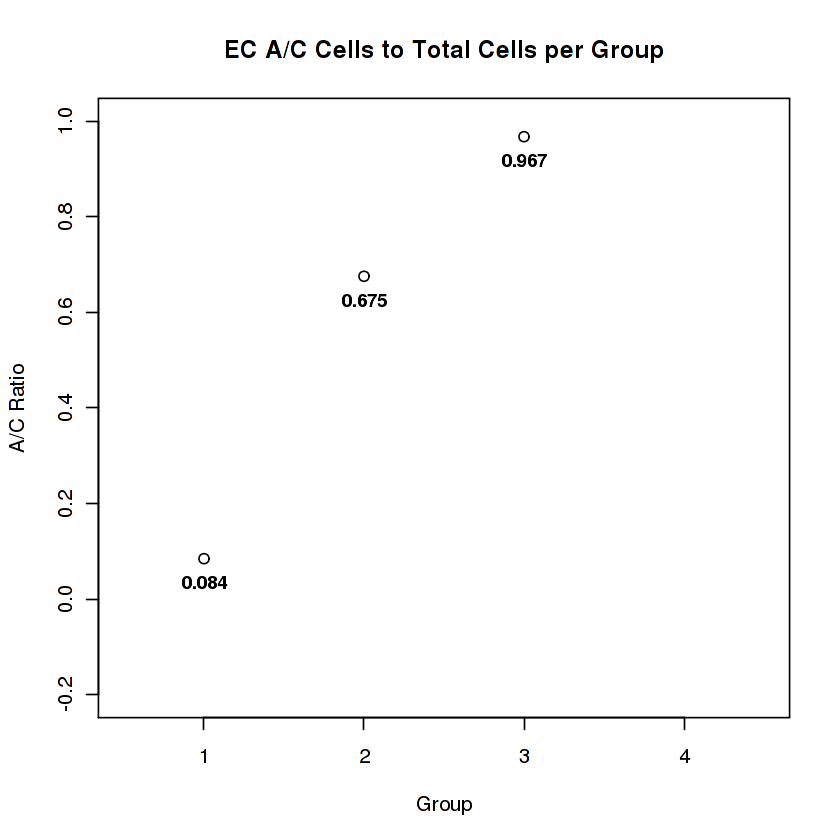

In [59]:
## Plot the EC group abundances
abunds <- as.numeric(names(table(colData(ecall_cds)$subgrp_cont)))
plot(x = 1:3, abunds,
     xlab = 'Group', ylab = "A/C Ratio", xlim = c(.5,4.5), ylim = c(-.2,1),
    main = 'EC A/C Cells to Total Cells per Group')
text(x = 1:3, abunds - .05,
     labels=substr(names(table(colData(ecall_cds)$subgrp_cont)), 1, 5), cex=0.9, font=2)



In [29]:
## This is needed for compare_models to work
ecmod_cds <- detect_genes(ecmod_cds)
ecall_cds <- detect_genes(ecall_cds)

In [30]:
## Models under study
mod0 <- '~patient'                              # Null Case for Cases 1 and 2
mod1 <- '~patient + subgrp'                     # Case 1
mod2 <- '~patient + subgrp_cont'                # Case 2

mod0c <- '~patient + condition'                 # Null Case for Cases 1c and 2c
mod1c <- '~patient + condition + subgrp'        # Case 1c
mod2c <- '~patient + condition + subgrp_cont'   # Case 2c

In [35]:
## Similar all gene test, but only perform mod2 and mod2c models using binary expression data

## Set up to create cds with expression data as binary (a binary 1 is UMI expression count 2 or more)
ecall_cds_exp <- 1 * (exprs(ecall_cds) > 1)

## Get the cell meta data
ecall_cds_meta <- as.data.frame(colData(ecall_cds)$patient)
rownames(ecall_cds_meta) <- colnames(ecall_cds_exp)
ecall_cds_meta <- cbind(ecall_cds_meta, colData(ecall_cds)$condition)
ecall_cds_meta <- cbind(ecall_cds_meta, colData(ecall_cds)$subgrp)
ecall_cds_meta <- cbind(ecall_cds_meta, colData(ecall_cds)$subgrp_c)
ecall_cds_meta <- cbind(ecall_cds_meta, colData(ecall_cds)$subgrp_cont)
colnames(ecall_cds_meta) <- c('patient', 'condition', 'subgrp', 'subgrp_c', 'subgrp_cont')

## Get the gene data
ecall_cds_gene <- as.data.frame(geneid2short[rownames(ecall_cds_exp)])
colnames(ecall_cds_gene) <- 'gene_short_name'
rownames(ecall_cds_gene) <- rownames(ecall_cds_exp) # Is not working!! May not be needed

In [36]:
## Recreate the binary cds from the expression data, cell and gene data
ecall_cds2 <- new_cell_data_set(ecall_cds_exp,
                         cell_metadata = ecall_cds_meta,
                         gene_metadata = ecall_cds_gene)

## This will add the cell count data to to the coefficient table
ecall_cds2 <- detect_genes(ecall_cds2)  

In [38]:
## Perform Monocle 3 DE Analysis for Cases 1 and 2
family_type_sel <- 2
ft <- c('quasipoisson', 'negbinomial', 'gaussian', 'binomial')[family_type_sel]

In [39]:
## First, do the DE without the condition covariate
gene_ec_fits_m2ab <- fit_models(ecall_cds2, cores = 1, expression_family = ft,
                                model_formula_str = mod2) 
all_coef_m2ab <- coefficient_table(gene_ec_fits_m2ab)

In [40]:
## Second, do the DE with the condition covariate
gene_ec_fits_m2cab <- fit_models(ecall_cds2, cores = 1, expression_family = ft,
                                model_formula_str = mod2c) 
all_coef_m2cab <- coefficient_table(gene_ec_fits_m2cab)

In [41]:
## Extract the continuous group coefficient from model case mod2 and mod2c, all gene set, binary data
subgrp_cont_coefab <- all_coef_m2ab[,c(1,2,5:13)] %>% filter(term == "subgrp_cont")
subgrp_cont_coefcab <- all_coef_m2cab[,c(1,2,5:13)] %>% filter(term == "subgrp_cont")

In [42]:
## Write the mod2 and mod2c all gene set, binary data
f19 <- '/Diff.ec_groups.1_3.allgenes.continuous.binary.model.coef.txt'
f19 <- paste(datdir, '/', ps$outdir, celltypes6[p], f19, sep = '')
write.table(subgrp_cont_coefab, f19, col.names = TRUE, row.names = FALSE)

f20 <- '/Diff.ec_groups.1_3.allgenes.continuous.xcondtion.binary.model.coef.txt'
f20 <- paste(datdir, '/', ps$outdir, celltypes6[p], f20, sep = '')
write.table(subgrp_cont_coefcab, f20, col.names = TRUE, row.names = FALSE)

In [31]:
## Perform Monocle 3 DE Analysis for case ec 2 , all gene set, condition not corrected, 
## continuous group covariate, continuous gene expression
family_type_selc <- 2
ft <- c('quasipoisson', 'negbinomial', 'gaussian', 'binomial')[family_type_selc]

gene_ec_fits_m2a <- fit_models(ecall_cds, cores = 1, expression_family = ft,
                                model_formula_str = mod2) 
all_coef_m2a <- coefficient_table(gene_ec_fits_m2a)

In [32]:
## Extract the continuous group coefficient from model case 2, all gene set, condition not corrected
subgrp_cont_coefa <- all_coef_m2a[,c(1,2,5:13)] %>% filter(term == "subgrp_cont")

In [14]:
## Write the results for case 2, all gene set, condition not corrected
f31 <- '/Diff.ec_groups.1_4.continuous.allgenes.continuous.expression.model.coef.txt'
f31 <- paste(datdir, '/', ps$outdir, celltypes6[p], f31, sep = '')
write.table(subgrp_cont_coefa, f31, col.names = TRUE, row.names = FALSE)

ERROR: Error in write.table(subgrp_cont_coefa, f31, header = TRUE, row.names = FALSE): unused argument (header = TRUE)


In [ ]:
## Plot the sorted q-values (FDR curves) for the EC and VSMC Continuous Variable (Abundance) Cases 

In [22]:
p <- 2
f33 <- '/Diff.ec_groups.1_3.allgenes.continuous.xcondtion.binary.model.coef.txt'
f33 <- paste(datdir, '/', ps$outdir, celltypes6[p], f33, sep = '')
ec_subgrp_cont_coefcab <- read.table(f33, header = TRUE)

In [23]:
p <- 3
f32 <- '/Diff.vsmc_groups.1_4.allgenes.continuous.xcondtion.binary.model.coef.txt'
f32 <- paste(datdir, '/', ps$outdir, celltypes6[p], f32, sep = '')
vsmc_subgrp_cont_coefcab <- read.table(f32, header = TRUE)

[1] 10294

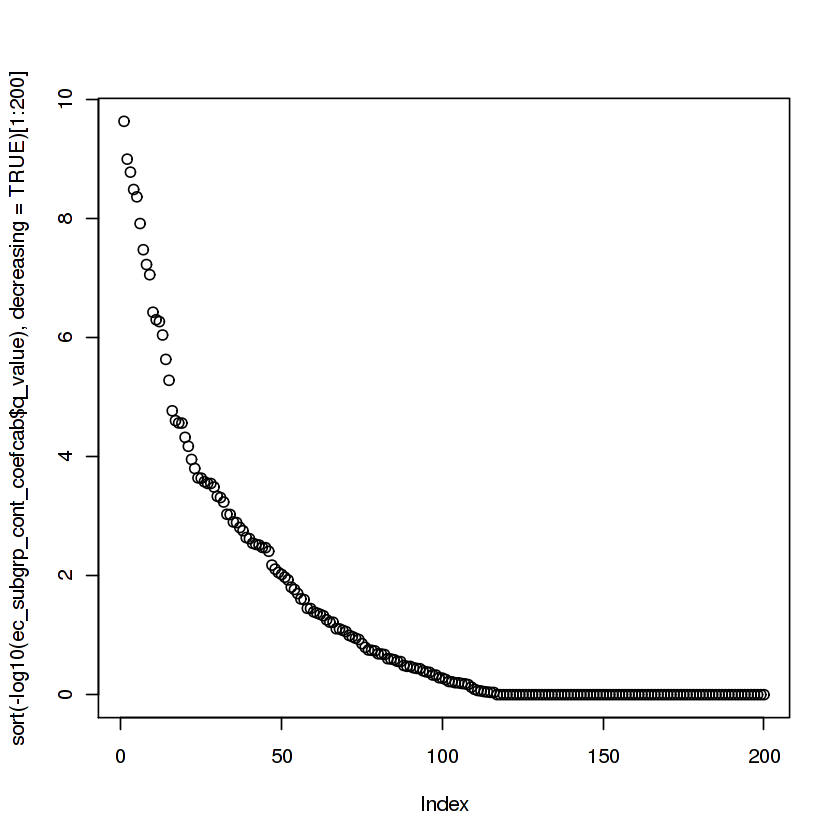

In [38]:
length(ec_subgrp_cont_coefcab$q_value)
plot(sort(-log10(ec_subgrp_cont_coefcab$q_value), decreasing = TRUE)[1:200])

[1] 24272

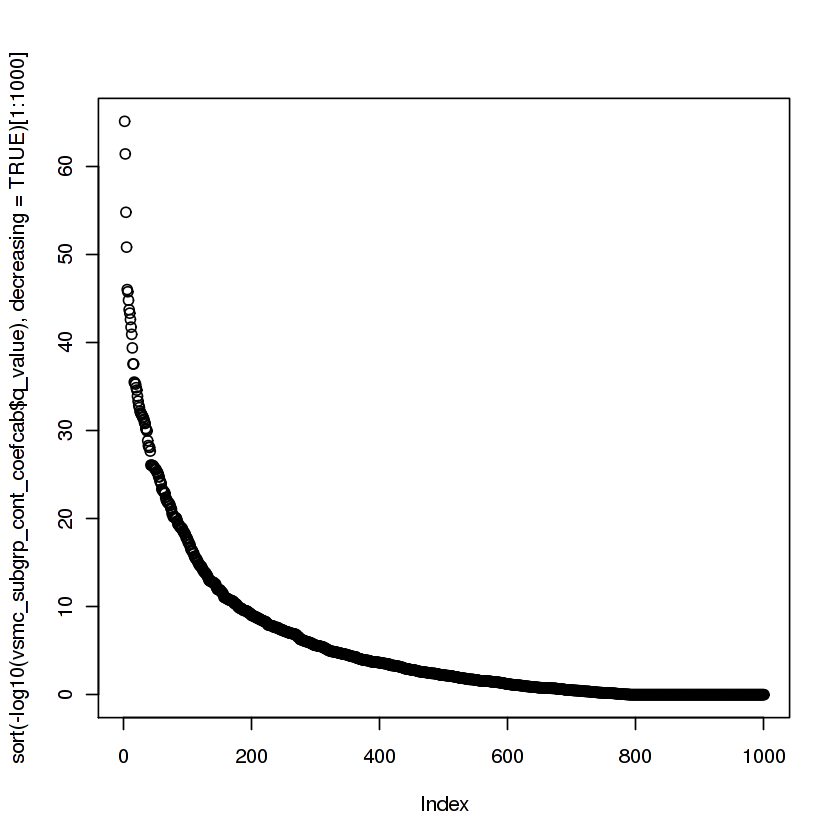

In [39]:
length(vsmc_subgrp_cont_coefcab$q_value)
plot(sort(-log10(vsmc_subgrp_cont_coefcab$q_value), decreasing = TRUE)[1:1000])